C:\Users\yimin\AppData\Local\Temp\ipykernel_3544\3727758087.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_data = bit_data.applymap(lambda x: 1 if pd.to_numeric(x, errors='coerce') > 0.4 else 0)


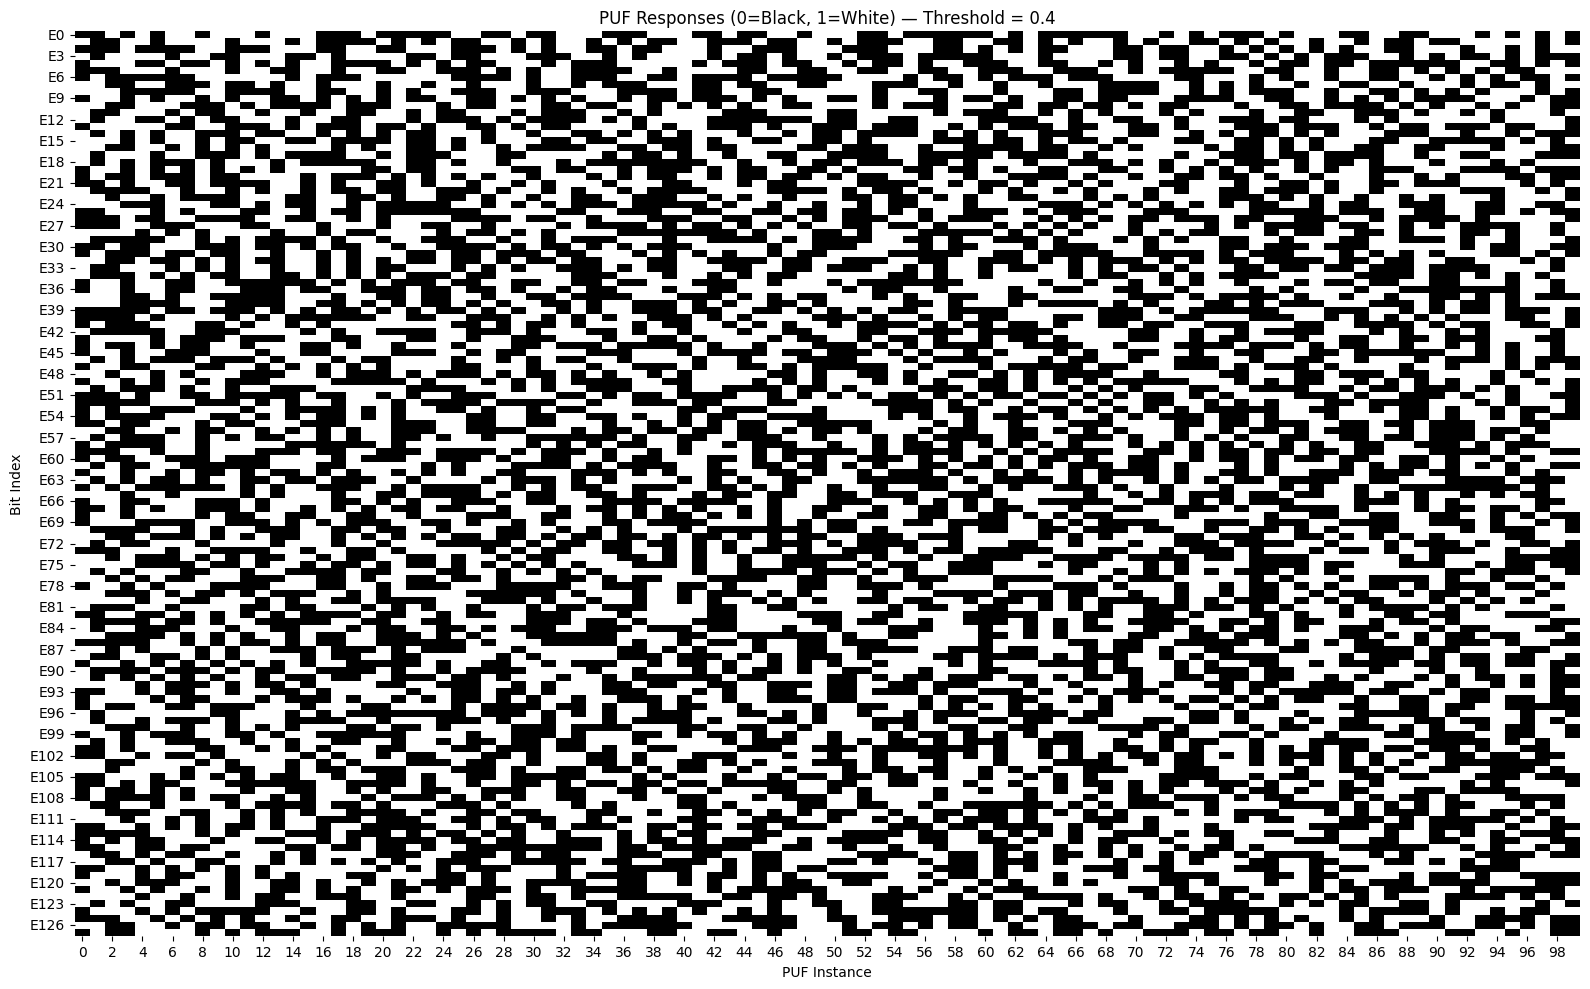

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume df is already loaded ---
# Example: 
df = pd.read_csv("ddpuf_mc.csv")

# Select only E0–E127 columns
bit_cols = [col for col in df.columns if col.startswith('E')]
bit_data = df[bit_cols]

# Convert values to binary using threshold 0.4
binary_data = bit_data.applymap(lambda x: 1 if pd.to_numeric(x, errors='coerce') > 0.4 else 0)

# Transpose: rows = bits, columns = PUF instances
bitwise_matrix = binary_data.T
bitwise_matrix.index = [f"E{i}" for i in range(bitwise_matrix.shape[0])]

# Visualize with heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(bitwise_matrix, cmap="gray_r", cbar=False)
plt.xlabel("PUF Instance")
plt.ylabel("Bit Index")
plt.title("PUF Responses (0=Black, 1=White) — Threshold = 0.4")
plt.tight_layout()
plt.show()


In [3]:
# Print the binary values for bit 0 (column "E0")
print(binary_data["E0"].values)


[1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1]


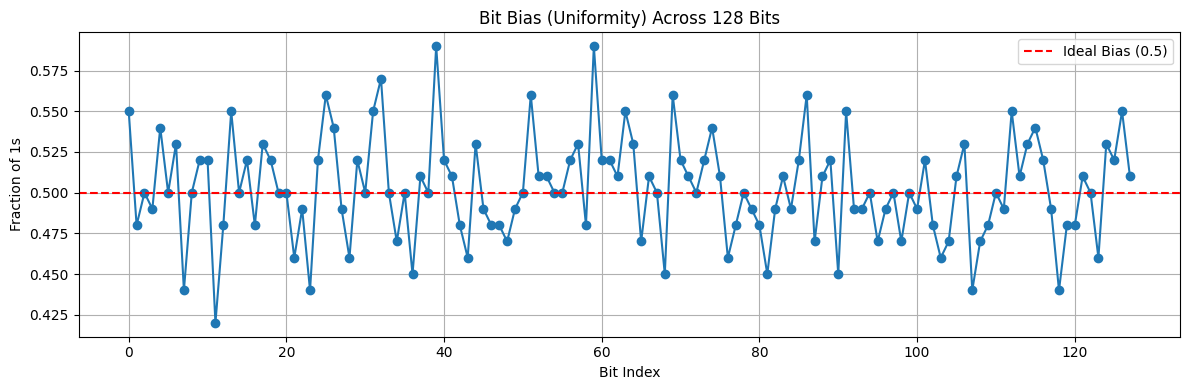

Bias Error (PUF): 0.0244
Uniformity (overall fraction of 1s): 0.5025


In [4]:
# Compute bit bias for all 128 bits
bit_bias = binary_data.mean(axis=0)

# Visualize bit bias across all 128 bits
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(range(128), bit_bias.values, marker='o', linestyle='-')
plt.axhline(0.5, color='r', linestyle='--', label='Ideal Bias (0.5)')
plt.title("Bit Bias (Uniformity) Across 128 Bits")
plt.xlabel("Bit Index")
plt.ylabel("Fraction of 1s")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Bias error: average deviation from ideal 0.5
bias_error = np.mean(np.abs(bit_bias - 0.5))
print(f"Bias Error (PUF): {bias_error:.4f}")
uniformity = binary_data.values.mean()
print(f"Uniformity (overall fraction of 1s): {uniformity:.4f}")


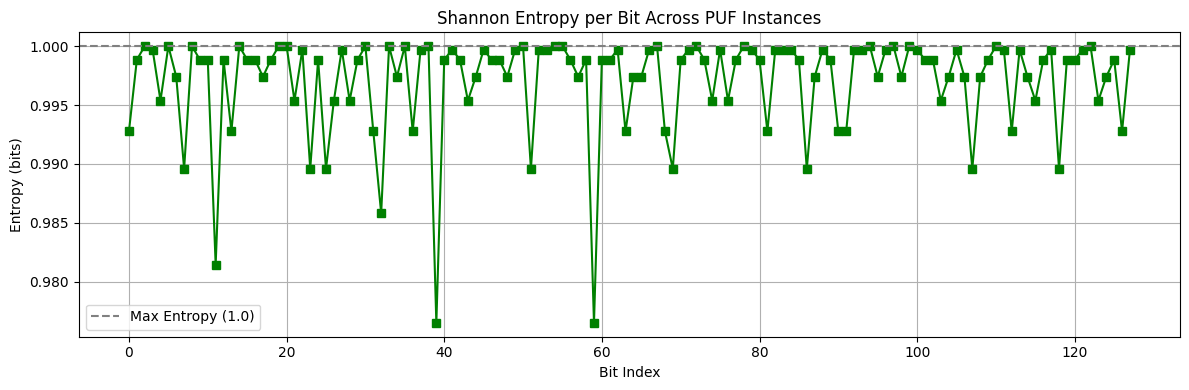

Average Shannon Entropy: 0.9971 bits


In [5]:
# Compute Shannon entropy for each bit
def compute_entropy(p):
    if p in [0, 1]:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

bit_entropy = bit_bias.apply(compute_entropy)

# Plot entropy
plt.figure(figsize=(12, 4))
plt.plot(range(128), bit_entropy.values, marker='s', linestyle='-', color='green')
plt.axhline(1.0, color='gray', linestyle='--', label='Max Entropy (1.0)')
plt.title("Shannon Entropy per Bit Across PUF Instances")
plt.xlabel("Bit Index")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Average entropy
avg_entropy = bit_entropy.mean()
print(f"Average Shannon Entropy: {avg_entropy:.4f} bits")


In [6]:
import numpy as np
from itertools import combinations

# Convert DataFrame to NumPy array
bit_array = binary_data.to_numpy()

# Compute pairwise Hamming distances
total_hd = 0
count = 0
n = len(bit_array)

for i, j in combinations(range(n), 2):
    hd = np.sum(bit_array[i] != bit_array[j])
    total_hd += hd
    count += 1

# Normalize by total bits and number of pairs
uniqueness = total_hd / (count * bit_array.shape[1])
print(f"Uniqueness (Avg. Hamming Distance): {uniqueness:.4f}")


Uniqueness (Avg. Hamming Distance): 0.5030
